In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.express as px
import folium
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

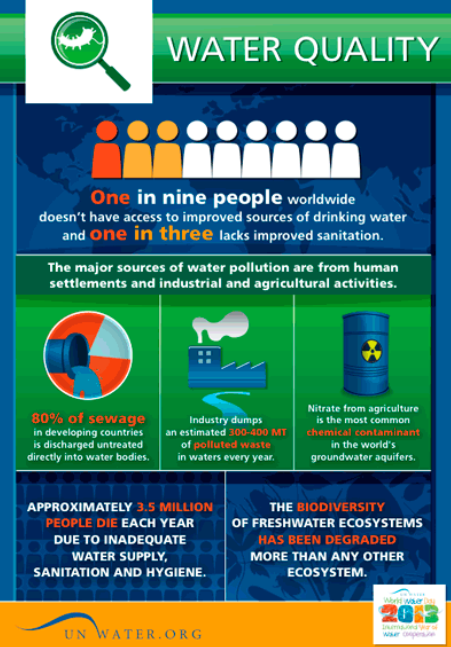

**Firstly i decided check water quality by country. I found data on this topic on the [GLOBAL OPEN DATA INDEX](https://index.okfn.org/dataset/water/).**

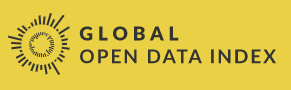

**Parameters for analysis**
* Fecal coliform
* Arsenic
* Fluoride levels
* Nitrates
* Total Dissolved Solids
* Data per water source
* Available for entire country

**There are 94 countries in the ranking. And 71 of them have water quality - 0%.**

**I made table with top 20 countries, other you can see in the source**.

In [ ]:
# data
countries = ['Finland', 'Brazil', 'Japan', 'New Zealand', 'Northern Ireland', 'Taiwan',
            'United States', 'Great Britain', 'France', 'Greece', 'India', 'Singapore',
            'Canada', 'Chile', 'Latvia', 'Australia', 'Slovenia', 'Portugal', 'Serbiea', 
            'Denmark']
quality = [100, 85, 85, 85, 85, 85, 85, 85, 70, 65, 65, 60, 50, 50, 50, 50, 50, 50, 45, 30]
df_countries = pd.DataFrame({'Country':countries, 'Quality,%':quality})
list_countries = []
for n in range(len(df_countries['Country'])):
    x = df_countries.loc[n,:]
    list_countries.append(x)

# colors
color_list=[['#D3D3D3', 'white']]

# fig
fig = plt.figure()

# axes
axes1 = fig.add_axes([0, 0, 1, 1]) 

# table
table=axes1.table(cellColours=color_list*20,cellText = list_countries, cellLoc ='left', loc ='center', colWidths=[0.3,0.3,],
                  colLabels=df_countries.columns,colColours=['steelblue']*2)      
# axis
axes1.set_axis_off() 

# font sie
table.auto_set_font_size(False) 
table.set_fontsize(16)  

# table size
table.scale(1.5, 1.8) 

In [ ]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
df.head()

In [ ]:
df.info()

**The data contains nan. Let's check mean values for columns.**

*For all*

In [ ]:
df.describe()

*For not potability*

In [ ]:
df[df['Potability']==0].describe()

*For potability*

In [ ]:
df[df['Potability']==1].describe()

**Change nan to mean values for not potability and potability**

In [ ]:
df['Potability'].replace({0:'Not potable', 1:'Potable'}, inplace=True)
df_not_potable = df[df['Potability']=='Not potable']
df_potable = df[df['Potability']=='Potable']

# ph
df_not_potable['ph'].fillna(df_not_potable['ph'].mean(),inplace=True)
df_potable['ph'].fillna(df_potable['ph'].mean(),inplace=True)

# sulfate
df_not_potable['Sulfate'].fillna(df_not_potable['Sulfate'].mean(),inplace=True)
df_potable['Sulfate'].fillna(df_potable['Sulfate'].mean(),inplace=True)

# sulfate
df_not_potable['Trihalomethanes'].fillna(df_not_potable['Trihalomethanes'].mean(),inplace=True)
df_potable['Trihalomethanes'].fillna(df_potable['Trihalomethanes'].mean(),inplace=True)

df = pd.concat([df_not_potable, df_potable])

In [ ]:
group_Potability = df.groupby('Potability')['ph'].count().reset_index()
group_Potability.rename(columns={'ph':'Count'}, inplace=True)
group_Potability['Percentage'] = round(group_Potability['Count']/sum(group_Potability['Count'])*100,2)

# fig
fig = plt.figure(figsize=(12,4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# barh
axes1.barh(width=group_Potability['Percentage'][0]+group_Potability['Percentage'][1], y=0, color='steelblue')
axes1.barh(width=group_Potability['Percentage'][0], y=0, color='#D3D3D3')

# annotation
axes1.text(group_Potability['Percentage'][0]/2.5, 0, f"{group_Potability['Percentage'][0]}%", color='black', fontsize=30, fontweight='bold')
axes1.text(group_Potability['Percentage'][0]/2.5, -0.1, f"({group_Potability['Count'][0]})", color='black', fontsize=30, fontweight='bold')
axes1.text((group_Potability['Percentage'][0]+group_Potability['Percentage'][1])/1.37, 0, f"{group_Potability['Percentage'][1]}%", color='black', fontsize=30, fontweight='bold')
axes1.text((group_Potability['Percentage'][0]+group_Potability['Percentage'][1])/1.37, -0.1, f"({group_Potability['Count'][1]})", color='black', fontsize=30, fontweight='bold')

# title
axes1.text(group_Potability['Percentage'][0]/3.5, 0.5, 'Not potability', color='Black', fontsize=30, fontweight='bold')
axes1.text((group_Potability['Percentage'][0]+group_Potability['Percentage'][1])/1.43, 0.5, 'Potability', color='Black', fontsize=30, fontweight='bold')

# axis
axes1.axis('off')

fig.show()

# PH

**PH shows how strongly acid or alkaline a substance is, in a range from 0 to 14:**
* 0-6 - acidic
* 7 - neutral
* 8-14 - alkaline.

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['ph'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['ph'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes 1
axes1.axvline(6.5, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axvline(8.5, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axhline(0.2, linestyle = ':', color = 'crimson', xmin = 0.474, xmax = 0.5823, lw=4)
axes1.text(6.3, 0.22, 'Normal for human', color='black', fontsize=14, fontweight='bold')
axes1.annotate('', xy=(2, 0.15), xytext=(6.3, 0.15), arrowprops=dict(color='crimson'))
axes1.annotate('', xy=(13, 0.15), xytext=(8.7, 0.15), arrowprops=dict(color='crimson'))
axes1.text(3.3, 0.17, 'Very acidic', color='black', fontsize=14, fontweight='bold')
axes1.text(9.7, 0.17, 'Very alkaline', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes 2
axes2.axvline(6.5, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axvline(8.5, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axhline(0.23, linestyle = ':', color = 'crimson', xmin = 0.487, xmax = 0.611, lw=4)
axes2.text(6.3, 0.25, 'Normal for human', color='black', fontsize=14, fontweight='bold')
axes2.annotate('', xy=(2, 0.15), xytext=(6.3, 0.15), arrowprops=dict(color='crimson'))
axes2.annotate('', xy=(13, 0.15), xytext=(8.7, 0.15), arrowprops=dict(color='crimson'))
axes2.text(3.3, 0.17, 'Very acidic', color='black', fontsize=14, fontweight='bold')
axes2.text(9.7, 0.17, 'Very alkaline', color='black', fontsize=14, fontweight='bold')


# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('ph', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('ph', color='black', fontsize=17)

# ticks
axes1.set_xticks(range(1,15))
axes2.set_xticks(range(1,15))

# title
axes1.text(-0.2, 0.4, 'ph (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(0, 0.4, 'ph (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['ph'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('ph', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'ph by potability', color='Black', fontsize=24, fontweight='bold')

# ticks
axes1.set_xticks(range(1,15))

fig.show()


**Normal values ph in water: 6.5 - 8.5.**

**Charts show that values ph in not potable water more out normal range than in potable water.**

# Hardness

**Hardness is caused by compounds of calcium and magnesium, and by a variety of other metals. General guidelines for classification of waters are:**

* 0 to 60 mg/L (milligrams per liter) as calcium carbonate is classified as soft; 
* 61 to 120 mg/L as moderately hard; 
* 121 to 180 mg/L as hard; 
* and more than 180 mg/L as very hard.

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Hardness'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Hardness'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotates for axes1
axes1.axvline(0, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axvline(60, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axvline(120, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axvline(180, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axhline(0.00724, linestyle = ':', color = 'crimson', xmin = 0.05, xmax = 1, lw=4)
axes1.text(25, 0.00784, 'Soft', color='black', fontsize=14, fontweight='bold')
axes1.text(61, 0.00784, 'Moderately hard', color='black', fontsize=14, fontweight='bold')
axes1.text(142, 0.00784, 'Hard', color='black', fontsize=14, fontweight='bold')
axes1.text(202, 0.00784, 'Very hard', color='black', fontsize=14, fontweight='bold')

# lines and annotates for axes2
axes2.axvline(0, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axvline(60, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axvline(120, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axvline(180, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axhline(0.006, linestyle = ':', color = 'crimson', xmin = 0.05, xmax = 1, lw=4)
axes2.text(25, 0.0066, 'Soft', color='black', fontsize=14, fontweight='bold')
axes2.text(61, 0.0066, 'Moderately hard', color='black', fontsize=14, fontweight='bold')
axes2.text(142, 0.0066, 'Hard', color='black', fontsize=14, fontweight='bold')
axes2.text(202, 0.0066, 'Very hard', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Hardness', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Hardness', color='black', fontsize=17)

# title
axes1.text(0, 0.015, 'Hardness (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(0, 0.013, 'Hardness (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Hardness'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Hardness', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Hardness by potability', color='Black', fontsize=24, fontweight='bold')

fig.show()

**We can see that a small number of observations, even in potable water, are classified as Soft and Moderately hard.**

**Also we observe that maximum values of hardness in potable water.**

# Solids

**Total dissolved solids (TDS) is the term used to describe the inorganic salts and small amounts of organic matter present in solution in water. The principal constituents are usually calcium, magnesium, sodium, and potassium cations and carbonate, hydrogencarbonate, chloride, sulfate, and nitrate anions.**

**Criteria that are presented in the [SDWF](https://www.safewater.org/fact-sheets-1/2017/1/23/tds-and-ph):**

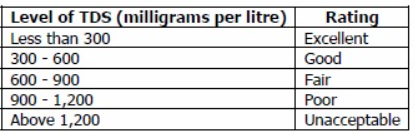

**If you have questions about why I'm used criteria milligrams per litre (mpl), when df has data part per million (ppm), you can visit this [url](http://www.endmemo.com/sconvert/mg_lppm.php).**

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Solids'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Solids'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotates for axes1
axes1.axvline(1200, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.annotate('', xy=(60000, 0.000015), xytext=(1300, 0.000015), arrowprops=dict(color='crimson'))
axes1.text(19000, 0.000018, 'Unacceptable', color='black', fontsize=14, fontweight='bold')

# lines and annotates for axes2
axes2.axvline(1200, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.annotate('', xy=(60000, 0.000015), xytext=(1300, 0.000015), arrowprops=dict(color='crimson'))
axes2.text(19000, 0.000018, 'Unacceptable', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Solids', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Solids', color='black', fontsize=17)

# title
axes1.text(0, 0.000053, 'Solids (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(0, 0.000053, 'Solids (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Solids'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Solids', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Solids by potability', color='Black', fontsize=24, fontweight='bold')

fig.show()

**Very strange results. I think there is an error in the data.**

# Chloramines

**Chloramine is a disinfectant used to treat drinking water. It is formed by mixing chlorine with ammonia. Although it is a weaker disinfectant than chlorine, it is more stable which extends its disinfectant benefits throughout a water utility's distribution system (a system of pipes that delivers water to homes).**



In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Chloramines'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Chloramines'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes1
axes1.axvline(4, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.annotate('', xy=(0.1, 0.1), xytext=(3.95, 0.1), arrowprops=dict(color='crimson'))
axes1.text(1, 0.11, 'Safely', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes2
axes2.axvline(4, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.annotate('', xy=(-1, 0.1), xytext=(3.95, 0.1), arrowprops=dict(color='crimson'))
axes2.text(1, 0.11, 'Safely', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Chloramines', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Chloramines', color='black', fontsize=17)

# ticks
axes1.set_xticks(range(1,15))
axes2.set_xticks(range(1,15))

# title
axes1.text(0, 0.28, 'Chloramines (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(-1.8, 0.28, 'Chloramines (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Chloramines'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Chloramines', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Chloramines by potability', color='Black', fontsize=24, fontweight='bold')

fig.show()

**Chloramine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water. At this level, harmful health effects are unlikely to occur. In drinking water more observations are in the safe range.**

# Sulfate

**Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.**

**The United States Environmental Protection Agency (U.S. EPA) has proposed a maximum allowable con-centration of 500 mg/L for sulfate in drinking water in order to avoidany health concern regarding human consumption.**

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Sulfate'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Sulfate'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes1
axes1.axvline(500, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.annotate('', xy=(200, 0.008), xytext=(498, 0.008), arrowprops=dict(color='crimson'))
axes1.text(395, 0.009, 'Safely', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes2
axes2.axvline(500, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.annotate('', xy=(200, 0.005), xytext=(498, 0.005), arrowprops=dict(color='crimson'))
axes2.text(395, 0.006, 'Safely', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Sulfate', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Sulfate', color='black', fontsize=17)

# title
axes1.text(150, 0.025, 'Sulfate (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(56, 0.019, 'Sulfate (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Sulfate'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Sulfate', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Sulfate by potability', color='Black', fontsize=24, fontweight='bold')

fig.show()

**In most observes the value of sulfates in normal range**

**Interesting that in potable water sulfates out of normal range.**

# Conductivity

**Conductivity of a substance is defined as 'the ability or power to conduct or transmit heat, electricity, or sound'. Pure water has an extremely low electrical conductivity because of the lack of impurities within it. The commonly used units for measuring electrical conductivity of water are:**

* μS/cm (microSiemens/cm)

*or*

* dS/m   (deciSiemens/m)

*Where: 1000 μs/cm = 1 dS/m*

**According to WHO standards, EC value should not exceeded 400 μS/cm.**

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Conductivity'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Conductivity'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes1
axes1.axvline(400, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.annotate('', xy=(150, 0.0015), xytext=(395, 0.0015), arrowprops=dict(color='crimson'))
axes1.text(265, 0.0017, 'Safely', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes2
axes2.axvline(400, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.annotate('', xy=(185, 0.0015), xytext=(395, 0.0015), arrowprops=dict(color='crimson'))
axes2.text(265, 0.0017, 'Safely', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Sulfate', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Sulfate', color='black', fontsize=17)

# title
axes1.text(55, 0.005, 'Conductivity (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(75, 0.005, 'Conductivity (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Sulfate'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Conductivity', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Conductivity by potability', color='Black', fontsize=24, fontweight='bold')

fig.show()

**And so, we can see that only a small part of the observations in potable and not potable water is outside the norm**

# Organic_carbon

**[Criteria](https://www.globalspec.com/learnmore/sensors_transducers_detectors/gas_sensing/total_organic_carbon_analyzers):**

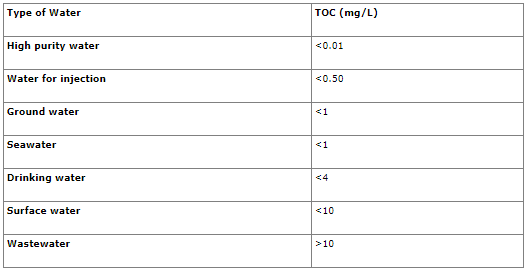

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Organic_carbon'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Organic_carbon'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes1
axes1.axvline(4, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axvline(10, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.axhline(0.06, linestyle = ':', color = 'crimson', xmin = 0, xmax = 10, lw=4)
axes1.text(0.01, 0.065, 'Potable water', color='black', fontsize=14, fontweight='bold')
axes1.text(4.6, 0.065, 'Surface water', color='black', fontsize=14, fontweight='bold')
axes1.text(12, 0.065, 'Wastewater', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes2
axes2.axvline(4, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axvline(10, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.axhline(0.063, linestyle = ':', color = 'crimson', xmin = 0, xmax = 10, lw=4)
axes2.text(0.01, 0.068, 'Potable water', color='black', fontsize=14, fontweight='bold')
axes2.text(4.6, 0.068, 'Surface water', color='black', fontsize=14, fontweight='bold')
axes2.text(12, 0.068, 'Wastewater', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Organic_carbon', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Organic_carbon', color='black', fontsize=17)

# title
axes1.text(2, 0.13, 'Organic_carbon (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(-0.3, 0.11, 'Organic_carbon (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Organic_carbon'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Organic_carbon', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Organic_carbon by potability', color='Black', fontsize=24, fontweight='bold')

fig.show()

**And so, we have only one observe with Organic_carbon < 4...**

# Trihalomethanes

**Trihalomethanes (THMs) are halogen-substituted single-carbon compounds with the general formula CHX3, where X represents a halogen, which may be fluorine, chlorine, bromine, or iodine, or combinations thereof.**

**THMs are formed in drinking-water primarily as a result of chlorination of organic matter present in raw water supplies. The rate and degree of THM formation increase as a function of the chlorine and humic acid concentration, temperature, pH, and bromide ion concentration**

**Dataset's author wrote "THM levels up to 80 ppm is considered safe in drinking water". I will use this criteria, because I didn't find any.**

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Trihalomethanes'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Trihalomethanes'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes1
axes1.axvline(80, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.annotate('', xy=(20, 0.012), xytext=(78, 0.012), arrowprops=dict(color='crimson'))
axes1.text(45, 0.014, 'Safely', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes2
axes2.axvline(80, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.annotate('', xy=(20, 0.012), xytext=(78, 0.012), arrowprops=dict(color='crimson'))
axes2.text(45, 0.014, 'Safely', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Trihalomethanes', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Trihalomethanes', color='black', fontsize=17)

# title
axes1.text(-12, 0.027, 'Trihalomethanes (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(-5, 0.025, 'Trihalomethanes (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Trihalomethanes'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Trihalomethanes', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Trihalomethanes', color='Black', fontsize=24, fontweight='bold')

fig.show()

**I don't see a strong difference between the two groups of observations.**

# Turbidity

**Turbidity is the amount of cloudiness in the water. This can vary from a river full of mud and silt where it would be impossible to see through the water (high turbidity), to a spring water which appears to be completely clear (low turbidity).Turbidity can be caused by:** 
* silt, sand and mud
* bacteria and other germs 
* chemical precipitates

**Drinking water should have a turbidity of 5 NTU/JTU or less.**

[(c) WHO](https://www.who.int/water_sanitation_health/hygiene/emergencies/fs2_33.pdf)

In [ ]:
# fig
fig = plt.figure(figsize=(12, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.3,1,1])

# kde
sns.kdeplot(df_not_potable['Turbidity'], color='#D3D3D3', fill=True, shade=True, alpha=0.9, ax=axes1)
sns.kdeplot(df_potable['Turbidity'], color='steelblue', fill=True, shade=True, alpha=0.9, ax=axes2)

# lines and annotate axes1
axes1.axvline(5, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes1.annotate('', xy=(1.3, 0.19), xytext=(4.95, 0.19), arrowprops=dict(color='crimson'))
axes1.text(2.9, 0.22, 'Safely', color='black', fontsize=14, fontweight='bold')

# lines and annotate axes2
axes2.axvline(5, linestyle = ':', color = 'crimson', ymin = 0, ymax = 0.5, lw=4)
axes2.annotate('', xy=(1.3, 0.19), xytext=(4.95, 0.19), arrowprops=dict(color='crimson'))
axes2.text(2.9, 0.22, 'Safely', color='black', fontsize=14, fontweight='bold')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('')
axes1.set_xlabel('Turbidity', color='black', fontsize=17)
axes2.set_ylabel('')
axes2.set_xlabel('Turbidity', color='black', fontsize=17)

# title
axes1.text(1, 0.43, 'Turbidity (Not potable)', color='Black', fontsize=24, fontweight='bold')
axes2.text(1, 0.43, 'Turbidity (Potable)', color='Black', fontsize=24, fontweight='bold')

fig.show()

In [ ]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=df['Turbidity'], y=df['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('Turbidity', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'Turbidity', color='Black', fontsize=24, fontweight='bold')

fig.show()

**Also I don't see a strong difference between the two groups of observations.**

**Else I want to know what is the relationship between features. Since we have outliers, we will use a nonparametric method - the Spearman correlation.**

In [ ]:
# corr_table
df_corr = df.corr('spearman')

# ph
ph = df.corr('spearman')['ph'][1:]

# Hardness
Hardness = df_corr['Hardness'][0]
Hardness = np.hstack([df_corr['Hardness'][0],df_corr['Hardness'][2:]])
hardness_list = [df_corr.columns[0]]
for i in df_corr.columns[2:]:
    hardness_list.append(i)

# Solids
Solids = df_corr['Solids'][:2]
Solids = np.hstack([df_corr['Solids'][:2],df_corr['Solids'][3:]])
solids_list = []
for i in df_corr.columns[:2]:
    solids_list.append(i)
for i in df_corr.columns[3:]:
    solids_list.append(i)
    
# Chloramines
Chloramines = df_corr['Chloramines'][:3]
Chloramines = np.hstack([df_corr['Chloramines'][:3],df_corr['Chloramines'][4:]])
chloramines_list = []
for i in df_corr.columns[:3]:
    chloramines_list.append(i)
for i in df_corr.columns[4:]:
    chloramines_list.append(i)

# Sulfate
Sulfate = df_corr['Sulfate'][:4]
Sulfate = np.hstack([df_corr['Sulfate'][:4],df_corr['Sulfate'][5:]])
sulfate_list = []
for i in df_corr.columns[:4]:
    sulfate_list.append(i)
for i in df_corr.columns[5:]:
    sulfate_list.append(i)
    
# Conductivity
Conductivity = df_corr['Conductivity'][:5]
Conductivity = np.hstack([df_corr['Conductivity'][:5],df_corr['Conductivity'][6:]])
conductivity_list = []
for i in df_corr.columns[:5]:
    conductivity_list.append(i)
for i in df_corr.columns[6:]:
    conductivity_list.append(i)    

# Organic_carbon
Organic_carbon = df_corr['Organic_carbon'][:6]
Organic_carbon = np.hstack([df_corr['Organic_carbon'][:6],df_corr['Organic_carbon'][7:]])
organic_carbon_list = []
for i in df_corr.columns[:6]:
    organic_carbon_list.append(i)
for i in df_corr.columns[7:]:
    organic_carbon_list.append(i)  
    
# Trihalomethanes
Trihalomethanes = df_corr['Trihalomethanes'][:7]
Trihalomethanes = np.hstack([df_corr['Trihalomethanes'][:7],df_corr['Trihalomethanes'][8:]])
trihalomethanes_list = []
for i in df_corr.columns[:7]:
    trihalomethanes_list.append(i)
for i in df_corr.columns[8:]:
    trihalomethanes_list.append(i)  
    
# Turbidity
Turbidity = df_corr['Turbidity'][:8]
Turbidity = np.hstack([df_corr['Turbidity'][:8],df_corr['Trihalomethanes'][9:]])
turbidity_list = []
for i in df_corr.columns[:8]:
    turbidity_list.append(i)
for i in df_corr.columns[9:]:
    turbidity_list.append(i)

# fig
fig = plt.figure(figsize=(12, 5))

#axes
axes1 = fig.add_axes([0,0,1,1])
axes2 = fig.add_axes([0,-1.2,1,1])
axes3 = fig.add_axes([0,-2.4,1,1])
axes4 = fig.add_axes([0,-3.6,1,1])
axes5 = fig.add_axes([0,-4.8,1,1])
axes6 = fig.add_axes([0,-6,1,1])
axes7 = fig.add_axes([0,-7.2,1,1])
axes8 = fig.add_axes([0,-8.4,1,1])
axes9 = fig.add_axes([0,-9.6,1,1])

# bar (ph)
axes1.bar(height=1, x=ph.index, color='white')
axes1.bar(height=ph[0], x=ph.index[0], color='crimson')
axes1.bar(height=ph[1:], x=ph.index[1:], color='steelblue')

# bar (hardness)
axes2.bar(height=1, x=hardness_list, color='white')
axes2.bar(height=Hardness[0], x=hardness_list[0], color='crimson')
axes2.bar(height=Hardness[1:], x=hardness_list[1:], color='steelblue')

# bar (solids)
axes3.bar(height=1, x=solids_list, color='white')
axes3.bar(height=Solids[:3], x=solids_list[:3], color='steelblue')
axes3.bar(height=Solids[3], x=solids_list[3], color='crimson')
axes3.bar(height=Solids[4:], x=solids_list[4:], color='steelblue')

# bar (chloramines)
axes4.bar(height=1, x=chloramines_list, color='white')
axes4.bar(height=Chloramines[:2], x=chloramines_list[:2], color='steelblue')
axes4.bar(height=Chloramines[2], x=chloramines_list[2], color='crimson')
axes4.bar(height=Chloramines[3:], x=chloramines_list[3:], color='steelblue')

# bar (sulfate)
axes5.bar(height=1, x=sulfate_list, color='white')
axes5.bar(height=Sulfate[:2], x=sulfate_list[:2], color='steelblue')
axes5.bar(height=Sulfate[2], x=sulfate_list[2], color='crimson')
axes5.bar(height=Sulfate[3:], x=sulfate_list[3:], color='steelblue')

# bar (conductivity)
axes6.bar(height=1, x=conductivity_list, color='white')
axes6.bar(height=Conductivity[0], x=conductivity_list[0], color='steelblue')
axes6.bar(height=Conductivity[1], x=conductivity_list[1], color='crimson')
axes6.bar(height=Conductivity[2:], x=conductivity_list[2:], color='steelblue')

# bar (organic_carbon)
axes7.bar(height=1, x=organic_carbon_list, color='white')
axes7.bar(height=Organic_carbon[0], x=organic_carbon_list[0], color='crimson')
axes7.bar(height=Organic_carbon[1:], x=organic_carbon_list[1:], color='steelblue')

# bar (trihalomethanes)
axes8.bar(height=1, x=trihalomethanes_list, color='white')
axes8.bar(height=Trihalomethanes[7], x=trihalomethanes_list[7], color='crimson')
axes8.bar(height=Trihalomethanes[:7], x=trihalomethanes_list[:7], color='steelblue')

# bar (turbidity)
axes9.bar(height=1, x=turbidity_list, color='white')
axes9.bar(height=Turbidity[0], x=turbidity_list[0], color='crimson')
axes9.bar(height=Turbidity[1:], x=turbidity_list[1:], color='steelblue')

# spines
axes1.spines[['left', 'top', 'right']].set_visible(False)
axes2.spines[['left', 'top', 'right']].set_visible(False)
axes3.spines[['left', 'top', 'right']].set_visible(False)
axes4.spines[['left', 'top', 'right']].set_visible(False)
axes5.spines[['left', 'top', 'right']].set_visible(False)
axes6.spines[['left', 'top', 'right']].set_visible(False)
axes7.spines[['left', 'top', 'right']].set_visible(False)
axes8.spines[['left', 'top', 'right']].set_visible(False)
axes9.spines[['left', 'top', 'right']].set_visible(False)

# lebels
axes1.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes1.set_xlabel('Features', color='black', fontsize=17)
axes2.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes2.set_xlabel('Features', color='black', fontsize=17)
axes3.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes3.set_xlabel('Features', color='black', fontsize=17)
axes4.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes4.set_xlabel('Features', color='black', fontsize=17)
axes5.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes5.set_xlabel('Features', color='black', fontsize=17)
axes6.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes6.set_xlabel('Features', color='black', fontsize=17)
axes7.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes7.set_xlabel('Features', color='black', fontsize=17)
axes8.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes8.set_xlabel('Features', color='black', fontsize=17)
axes9.set_ylabel('Spearman correlation', color='black', fontsize=17)
axes9.set_xlabel('Features', color='black', fontsize=17)

# ticks
axes1.set_yticks(np.arange(-1,1.1, 0.2))
axes2.set_yticks(np.arange(-1,1.1, 0.2))
axes3.set_yticks(np.arange(-1,1.1, 0.2))
axes4.set_yticks(np.arange(-1,1.1, 0.2))
axes5.set_yticks(np.arange(-1,1.1, 0.2))
axes6.set_yticks(np.arange(-1,1.1, 0.2))
axes7.set_yticks(np.arange(-1,1.1, 0.2))
axes8.set_yticks(np.arange(-1,1.1, 0.2))
axes9.set_yticks(np.arange(-1,1.1, 0.2))

# title
axes1.text(-0.6, 0.8, 'Correlation ph with other features', color='Black', fontsize=24, fontweight='bold')
axes2.text(-0.6, 0.8, 'Correlation Hardness with other features', color='Black', fontsize=24, fontweight='bold')
axes3.text(-0.6, 0.8, 'Correlation Solids with other features', color='Black', fontsize=24, fontweight='bold')
axes4.text(-0.6, 0.8, 'Correlation Chloramines with other features', color='Black', fontsize=24, fontweight='bold')
axes5.text(-0.6, 0.8, 'Correlation Sulfate with other features', color='Black', fontsize=24, fontweight='bold')
axes6.text(-0.6, 0.8, 'Correlation Conductivity with other features', color='Black', fontsize=24, fontweight='bold')
axes7.text(-0.6, 0.8, 'Correlation Organic_carbon with other features', color='Black', fontsize=24, fontweight='bold')
axes8.text(-0.6, 0.8, 'Correlation Trihalomethanes with other features', color='Black', fontsize=24, fontweight='bold')
axes9.text(-0.6, 0.8, 'Correlation Turbidity with other features', color='Black', fontsize=24, fontweight='bold')

fig.show()

**From the presented data we observe a weak correlation between the features.**

**After the analysis I can say that I do not understand what the classification of potable and not potable water was based on. According to the criteria, if not all, then almost all observations should be Not potable.**